In [1]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import re
import nltk

In [3]:
df = pd.read_csv('british_airways_reviews.csv')

df.head()

,Review Content,Review Rating,Review Date,Review Country
0,"✅ Trip Verified | Terrible overall, medium ser...",5,7th February 2025,(Switzerland)
1,✅ Trip Verified | London Heathrow to Male In...,1,1st February 2025,(United Kingdom)
2,Not Verified | Very good flight following an ...,9,20th January 2025,(United Kingdom)
3,Not Verified | An hour's delay due to late ar...,9,19th January 2025,(United Kingdom)
4,✅ Trip Verified | I booked through BA becaus...,7,15th January 2025,(United Kingdom)


In [4]:
df['Trip Verified'] = df['Review Content'].str.contains('Trip Verified')

In [5]:
df['Trip Verified'].value_counts()

False    2607
True     1306
Name: Trip Verified, dtype: int64

In [6]:
df.head()

,Review Content,Review Rating,Review Date,Review Country,Trip Verified
0,"✅ Trip Verified | Terrible overall, medium ser...",5,7th February 2025,(Switzerland),True
1,✅ Trip Verified | London Heathrow to Male In...,1,1st February 2025,(United Kingdom),True
2,Not Verified | Very good flight following an ...,9,20th January 2025,(United Kingdom),False
3,Not Verified | An hour's delay due to late ar...,9,19th January 2025,(United Kingdom),False
4,✅ Trip Verified | I booked through BA becaus...,7,15th January 2025,(United Kingdom),True


In [7]:
#Checking for missing values
df.isnull().sum()

Review Content    0
Review Rating     0
Review Date       0
Review Country    2
Trip Verified     0
dtype: int64

In [8]:
#lemmatization of the review content
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

review = df['Review Content'].str.strip("✅ Trip Verified |")

corpus = []

#looping through the reviews

for r in review:
    r = re.sub('[^a-zA-Z]', ' ', r)
    r = r.lower()
    r = r.split()
    r = [lemmatizer.lemmatize(word) for word in r if not word in set(stopwords.words('english'))]
    r = ' '.join(r)
    corpus.append(r)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohdt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df['corpus'] = corpus

In [10]:
df.head()

,Review Content,Review Rating,Review Date,Review Country,Trip Verified,corpus
0,"✅ Trip Verified | Terrible overall, medium ser...",5,7th February 2025,(Switzerland),True,ble overall medium service flight delayed help...
1,✅ Trip Verified | London Heathrow to Male In...,1,1st February 2025,(United Kingdom),True,london heathrow male new business class ba con...
2,Not Verified | Very good flight following an ...,9,20th January 2025,(United Kingdom),False,verified good flight following equally good fl...
3,Not Verified | An hour's delay due to late ar...,9,19th January 2025,(United Kingdom),False,verified hour delay due late arrival incoming ...
4,✅ Trip Verified | I booked through BA becaus...,7,15th January 2025,(United Kingdom),True,booked ba loganair representative manchester a...


In [11]:
df.dtypes

Review Content    object
Review Rating     object
Review Date       object
Review Country    object
Trip Verified       bool
corpus            object
dtype: object

In [12]:
df['Review Date'] = pd.to_datetime(df['Review Date'])

print(df.dtypes)

df.head()

Review Content            object
Review Rating             object
Review Date       datetime64[ns]
Review Country            object
Trip Verified               bool
corpus                    object
dtype: object


,Review Content,Review Rating,Review Date,Review Country,Trip Verified,corpus
0,"✅ Trip Verified | Terrible overall, medium ser...",5,2025-02-07,(Switzerland),True,ble overall medium service flight delayed help...
1,✅ Trip Verified | London Heathrow to Male In...,1,2025-02-01,(United Kingdom),True,london heathrow male new business class ba con...
2,Not Verified | Very good flight following an ...,9,2025-01-20,(United Kingdom),False,verified good flight following equally good fl...
3,Not Verified | An hour's delay due to late ar...,9,2025-01-19,(United Kingdom),False,verified hour delay due late arrival incoming ...
4,✅ Trip Verified | I booked through BA becaus...,7,2025-01-15,(United Kingdom),True,booked ba loganair representative manchester a...


In [13]:
df.describe()

C:\Users\mohdt\AppData\Local\Temp\ipykernel_12472\3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Review Content,Review Rating,Review Date,Review Country,Trip Verified,corpus
count,3913,3913,3913,3911,3913,3913
unique,3899,10,1983,74,2,3899
top,Hannover - LHR. What a miserable experience th...,1,2015-01-19 00:00:00,(United Kingdom),False,hannover lhr miserable experience return ticke...
freq,2,1281,26,2444,2607,2
first,NaN,NaN,2011-10-09 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2025-02-07 00:00:00,NaN,NaN,NaN


In [14]:
print("Review Rating: ", df['Review Rating'].unique())
print("Review Country: ", df['Review Country'].unique())
print("Trip Verified: ", df['Trip Verified'].unique())

Review Rating:  ['5' '1' '9' '7' '2' '8' '4' '3' '6' 'n']
Review Country:  ['(Switzerland)' '(United Kingdom)' '(United States)' '(Netherlands)'
 '(South Africa)' '(Australia)' '(Iceland)' '(Singapore)' '(Turkey)'
 '(Canada)' '(India)' '(Germany)' '(Morocco)' '(Hong Kong)' '(Lebanon)'
 '(Italy)' '(New Zealand)' '(Austria)' '(Denmark)' '(Belgium)' '(Nigeria)'
 '(Japan)' '(Ukraine)' '(Ireland)' '(Spain)' '(China)' '(Ecuador)'
 '(Romania)' '(France)' '(Kuwait)' '(Poland)' '(Qatar)' '(Greece)'
 '(Senegal)' '(United Arab Emirates)' '(Cyprus)' '(Chile)' '(Sweden)'
 '(Czech Republic)' '(Malaysia)' '(Ghana)' '(Bermuda)' '(Botswana)'
 '(Brazil)' '(Panama)' '(Russian Federation)' '(Philippines)' '(Bulgaria)'
 '(Thailand)' '(Argentina)' '(Mexico)' '(Saint Kitts and Nevis)'
 '(Vietnam)' '(Norway)' '(Jordan)' '(Taiwan)' '(Slovakia)' '(Israel)'
 '(South Korea)' '(Saudi Arabia)' '(Hungary)' '(Portugal)'
 '(Cayman Islands)' '(Costa Rica)' '(Egypt)' '(Laos)' '(Indonesia)'
 '(Bahrain)' '(Dominican Repub

In [15]:
df['Review Rating'].value_counts()

1    1281
2     442
3     427
8     381
9     323
7     319
5     279
4     255
6     201
n       5
Name: Review Rating, dtype: int64

In [16]:
#Removing rows with n in the review rating column

df = df[df['Review Rating'] != 'n']

df.shape

(3908, 6)

In [17]:
df.isnull().sum()

Review Content    0
Review Rating     0
Review Date       0
Review Country    2
Trip Verified     0
corpus            0
dtype: int64

In [18]:
#Dropping the missing values in the review country column

df = df.dropna(subset=['Review Country'])

In [19]:
df.isnull().sum()

Review Content    0
Review Rating     0
Review Date       0
Review Country    0
Trip Verified     0
corpus            0
dtype: int64

In [20]:
df.shape

(3906, 6)

In [21]:
df.reset_index(drop=True, inplace=True)

df.head()

,Review Content,Review Rating,Review Date,Review Country,Trip Verified,corpus
0,"✅ Trip Verified | Terrible overall, medium ser...",5,2025-02-07,(Switzerland),True,ble overall medium service flight delayed help...
1,✅ Trip Verified | London Heathrow to Male In...,1,2025-02-01,(United Kingdom),True,london heathrow male new business class ba con...
2,Not Verified | Very good flight following an ...,9,2025-01-20,(United Kingdom),False,verified good flight following equally good fl...
3,Not Verified | An hour's delay due to late ar...,9,2025-01-19,(United Kingdom),False,verified hour delay due late arrival incoming ...
4,✅ Trip Verified | I booked through BA becaus...,7,2025-01-15,(United Kingdom),True,booked ba loganair representative manchester a...


In [22]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import datetime as dt

from wordcloud import WordCloud,  STOPWORDS

import plotly.express as px

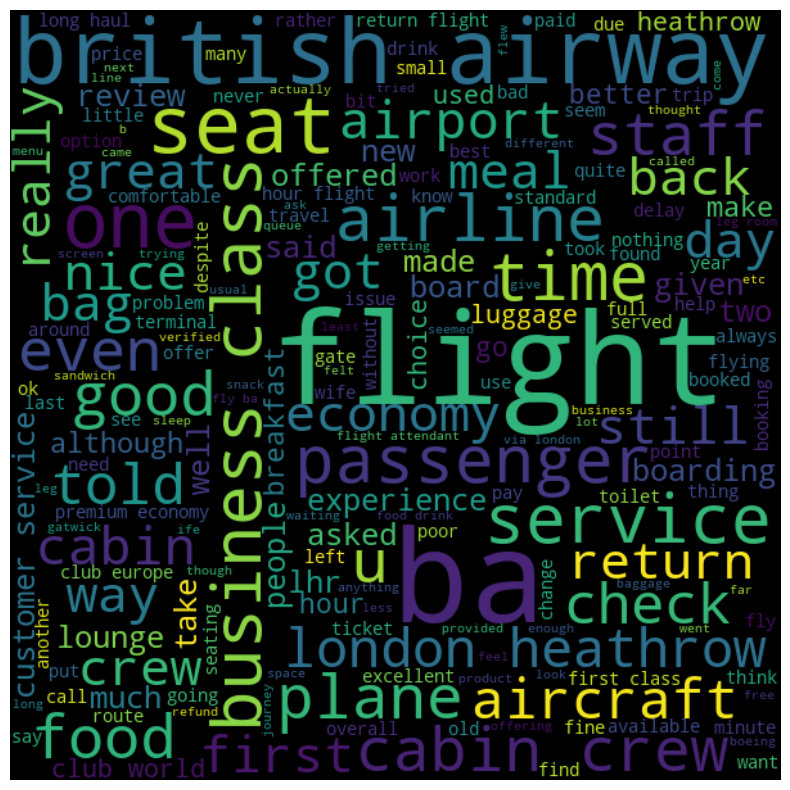

In [25]:
#create a word cloud image

reviews = ' '.join(df['corpus'])
plt.figure(figsize = (20, 10))

stopwords = set(stopwords.words('english'))


wordcloud = WordCloud(width = 600, height = 600, max_font_size= 100, stopwords = STOPWORDS).generate(' '.join(df['corpus']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

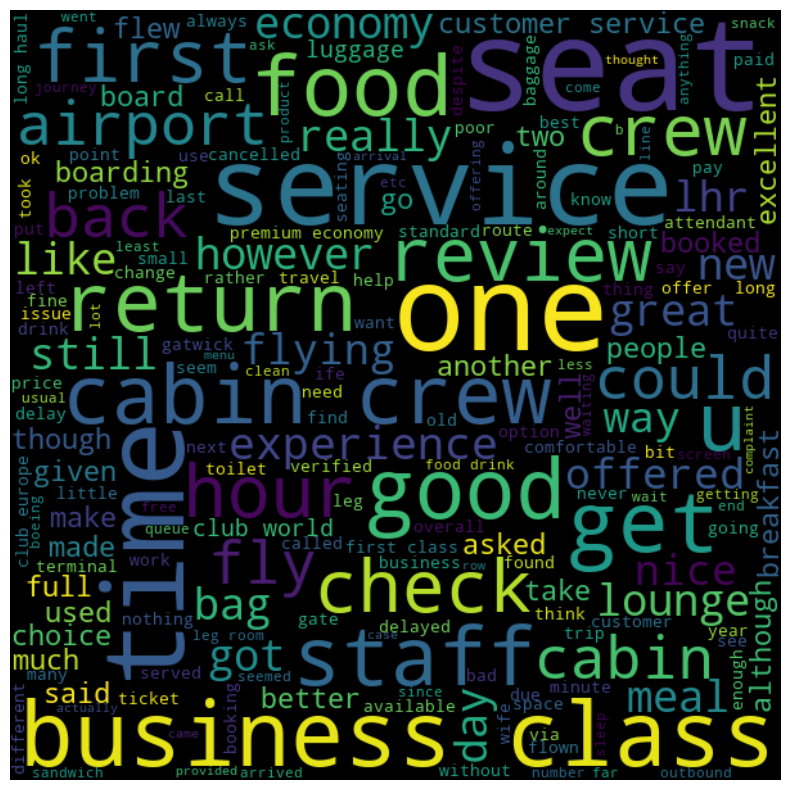

In [26]:
import nltk
from nltk.corpus import stopwords
reviews = ' '.join(df['corpus'])
plt.figure(figsize = (20, 10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight","british","airway","airline","plane","told","also","passenger","london","heathrow","aircraft","cloud","even","would"])

wordcloud = WordCloud(width = 600, height = 600, max_font_size= 100, stopwords = stopwords).generate(' '.join(df['corpus']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

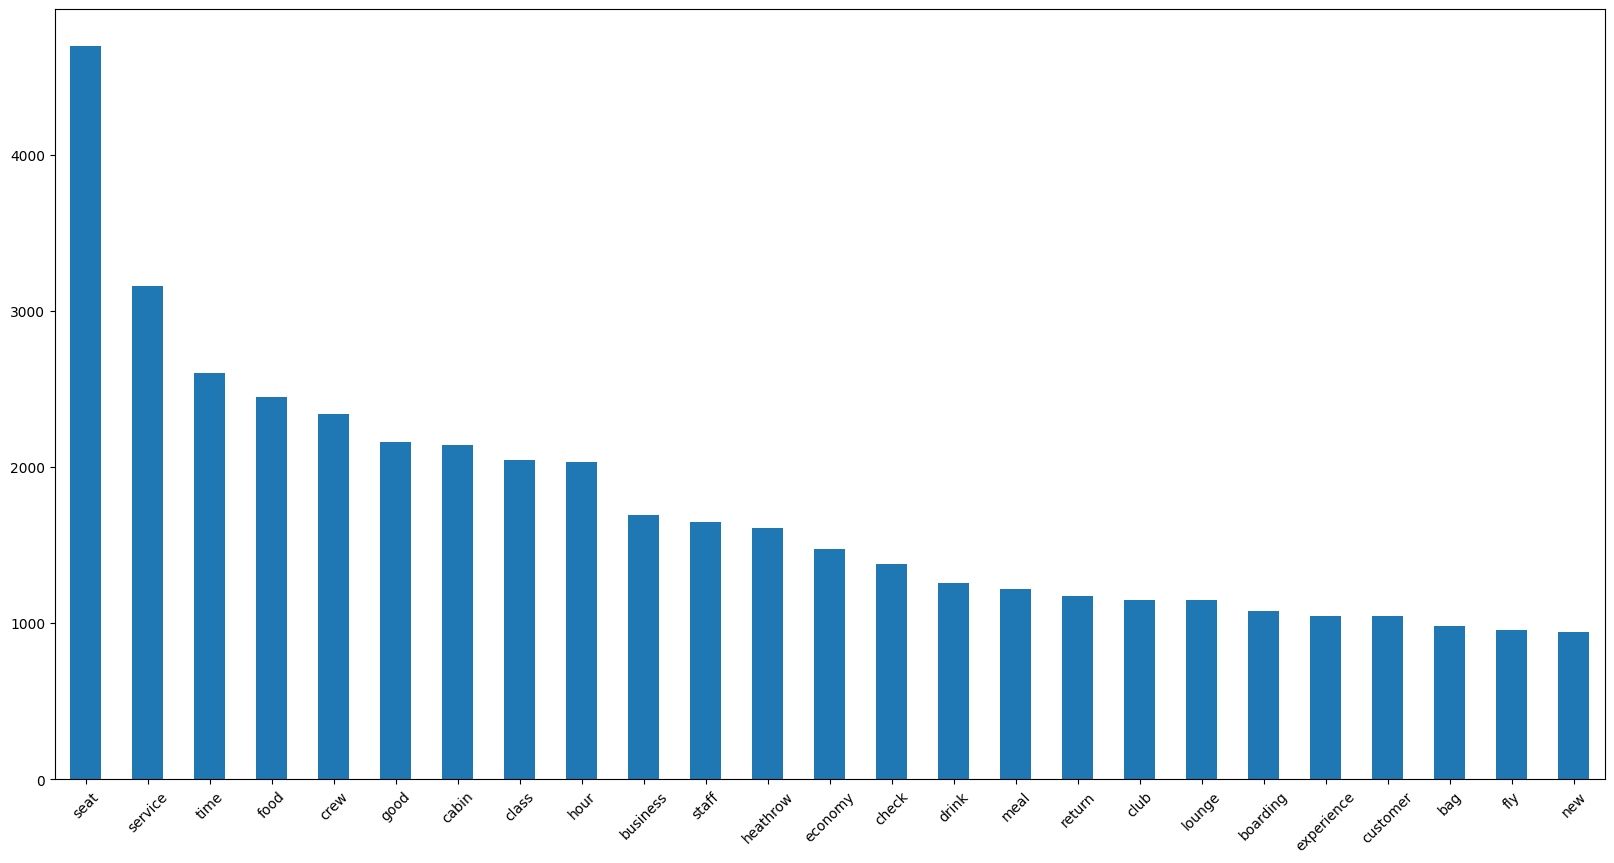

In [27]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

words = reviews.split(" ")

#remove words which will not be used for sentiment analysis

stopwords = text.ENGLISH_STOP_WORDS.union(['ba','flight','passenger','u','london','airway','british','airline','plane','lhr','review'])


n_words = [word for word in words if word.lower() not in stopwords]

nlp_words = FreqDist(n_words).most_common(25)

#df of words and their frequency

f_df = pd.Series(dict(nlp_words))

#plot the frequency of the words to show what people are talking about

plt.figure(figsize=(20,10))
f_df.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45)
plt.show()

<Axes: >

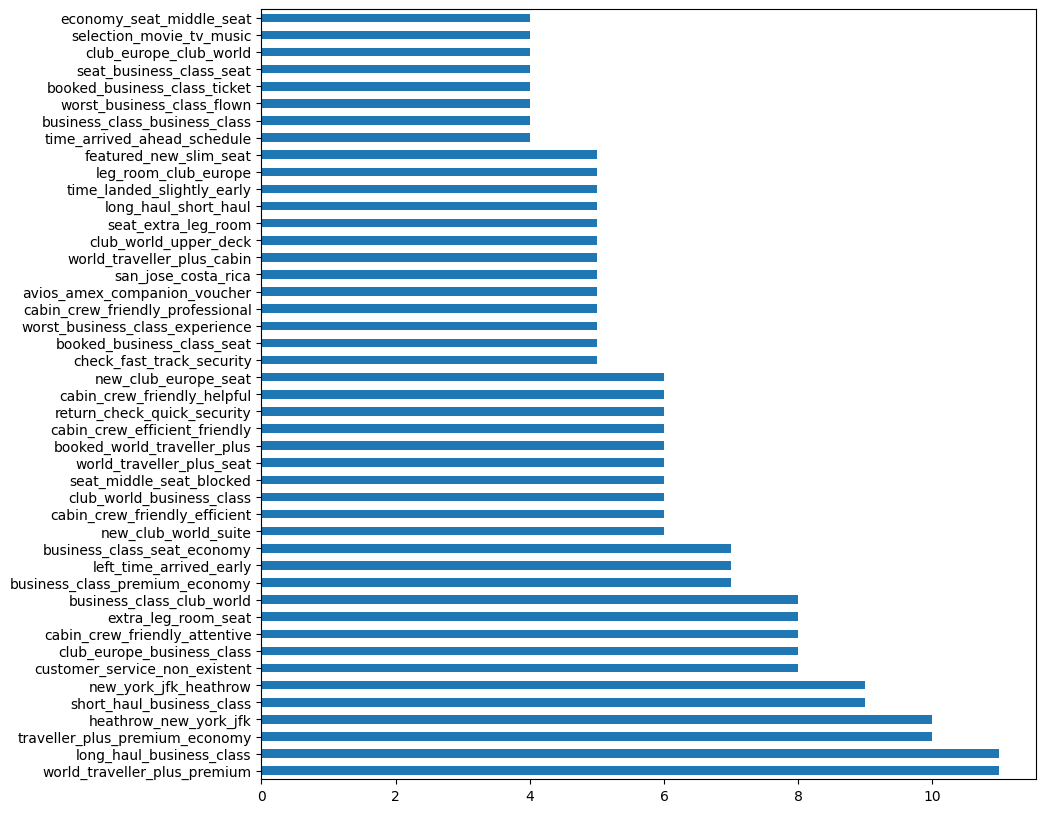

In [28]:
import nltk.collections as nc
from nltk import FreqDist, bigrams

#we already have reivews, words, n_words and nlp_words as defined above

def get_frequency_distribution(new_words,number_of_n_grams):
    from nltk import ngrams

    ngrams = ngrams(new_words,number_of_n_grams)
    ngrams_frequency = FreqDist(ngrams).most_common(45)
    ngrams_sorted = {k:v for k,v in sorted(ngrams_frequency, key=lambda item: item[1], reverse=True)}
    ngrams_joined = {'_'.join(k):v for k,v in sorted(ngrams_frequency, key=lambda item: item[1], reverse=True)}

    #now convert it into panda series

    ngrams_frequency = pd.Series(ngrams_joined)
    plt.figure(figsize=(10,10))
    ax = ngrams_frequency.plot(kind='barh')

    return ax


get_frequency_distribution(n_words,4)

So basically we can see people are talking a lot about the good things of british ariways but let`s see where they are lacking so we going to draw the same plot with ratings divided into three segements 1-3, 4-6, 7-10

In [29]:
ratings_1_3 = df[df['Review Rating'].isin(['1','2','3'])]
ratings_4_6 = df[df['Review Rating'].isin(['4','5','6'])]
ratings_7_10 = df[df['Review Rating'].isin(['7','8','9','10'])]

ratings_1_3.shape, ratings_4_6.shape, ratings_7_10.shape

((2150, 6), (735, 6), (1021, 6))

In [30]:
ratings_1_3 = " ".join(ratings_1_3['corpus'])
ratings_4_6 = " ".join(ratings_4_6['corpus'])
ratings_7_10 = " ".join(ratings_7_10['corpus'])

#spliting all of em

words_1_3 = ratings_1_3.split(" ")
words_4_6 = ratings_4_6.split(" ")
words_7_10 = ratings_7_10.split(" ")

<Axes: >

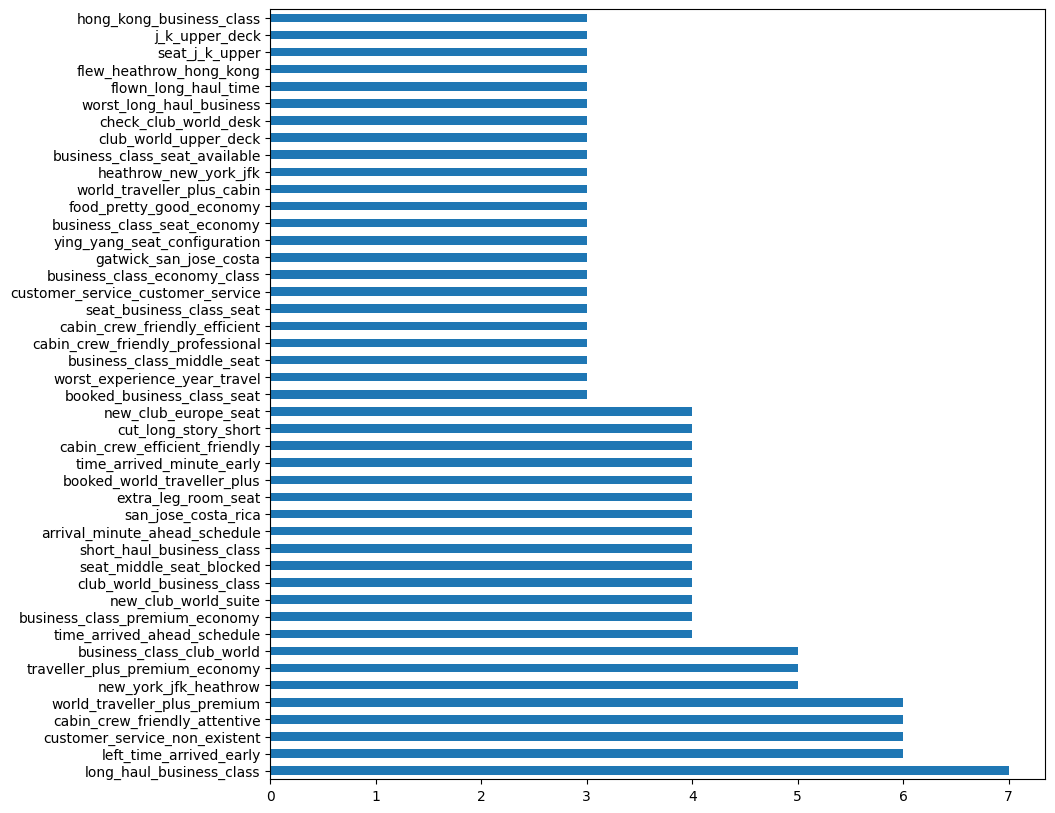

In [31]:
#plotting the frequency of the words

n_words_1_3 = [word for word in words_1_3 if word not in stopwords]

get_frequency_distribution(n_words_1_3,4)

<Axes: >

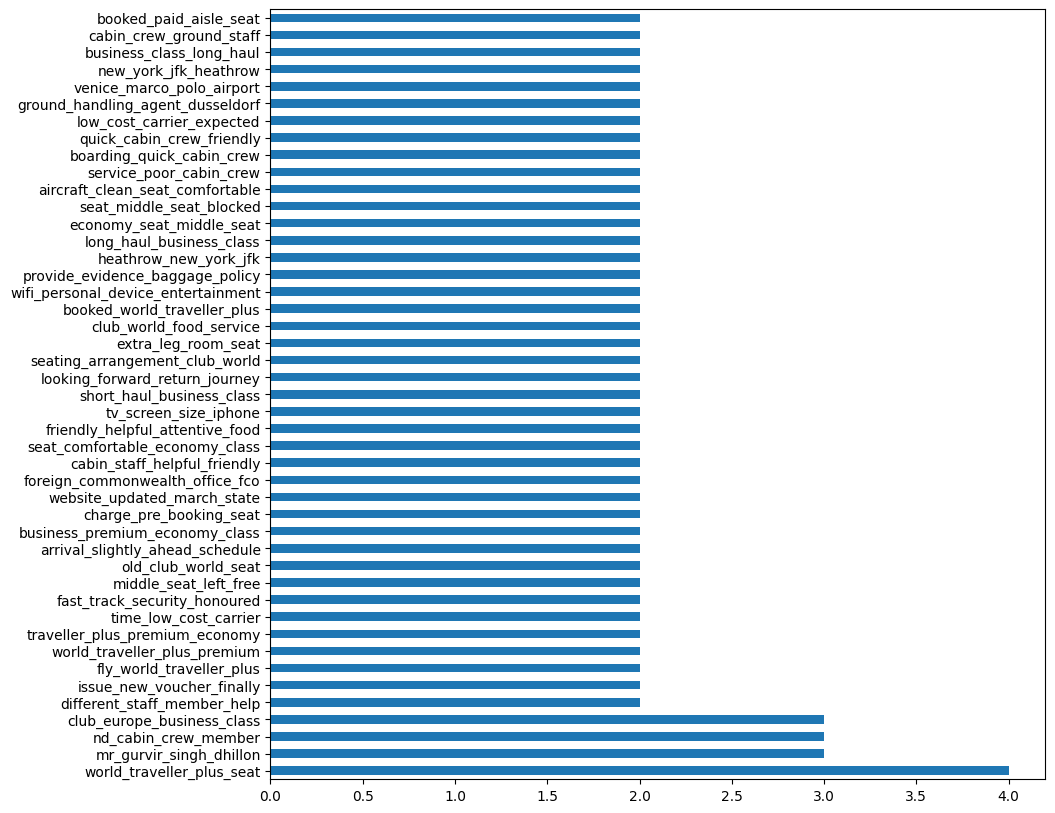

In [32]:
#plotting the frequency of the words

n_words_4_6 = [word for word in words_4_6 if word not in stopwords]

get_frequency_distribution(n_words_4_6,4)

<Axes: >

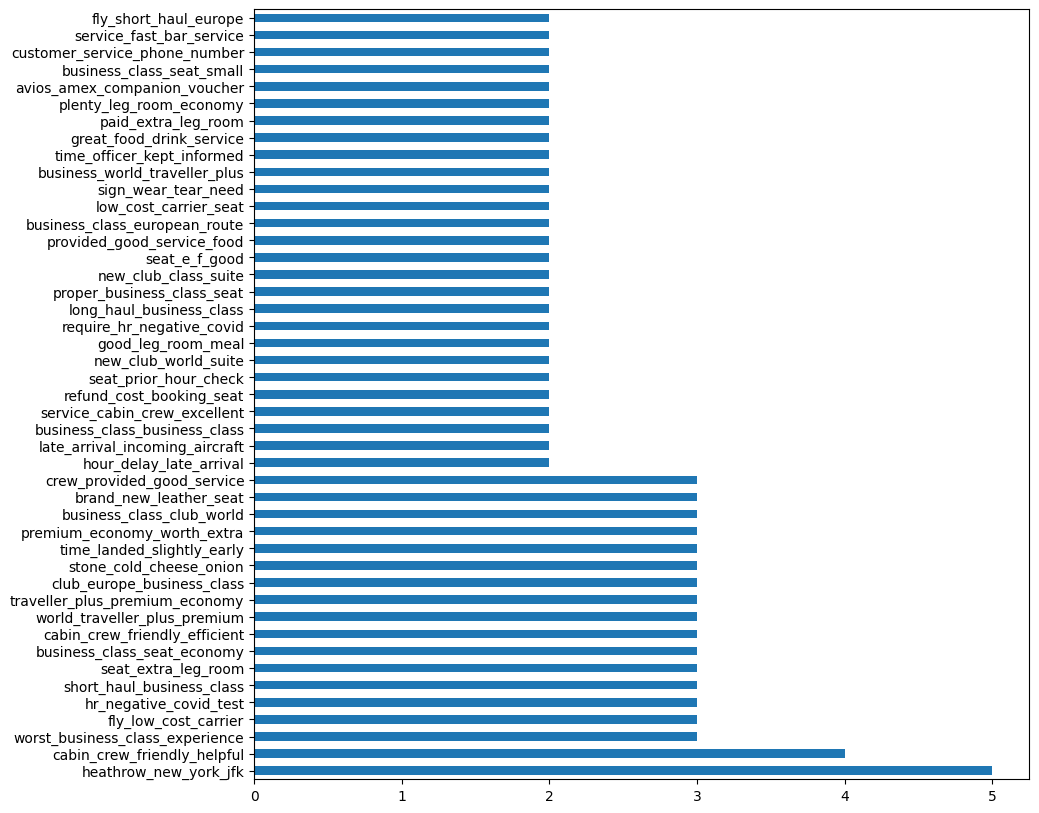

In [33]:
#plotting the frequency of the words

n_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_frequency_distribution(n_words_7_10,4)

In [34]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
#sentiment analysis using textblob

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

df['polarity'] = 0

for i in range(len(df.corpus)):
    senti = TextBlob(df.corpus[i])
    polarity = senti.sentiment.polarity
    subjectivity = senti.sentiment.subjectivity
    df['polarity'][i] = polarity

df.head()

C:\Users\mohdt\AppData\Local\Temp\ipykernel_12472\2835901225.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = polarity


,Review Content,Review Rating,Review Date,Review Country,Trip Verified,corpus,polarity
0,"✅ Trip Verified | Terrible overall, medium ser...",5,2025-02-07,(Switzerland),True,ble overall medium service flight delayed help...,-0.500000
1,✅ Trip Verified | London Heathrow to Male In...,1,2025-02-01,(United Kingdom),True,london heathrow male new business class ba con...,0.286526
2,Not Verified | Very good flight following an ...,9,2025-01-20,(United Kingdom),False,verified good flight following equally good fl...,0.314286
3,Not Verified | An hour's delay due to late ar...,9,2025-01-19,(United Kingdom),False,verified hour delay due late arrival incoming ...,0.137500
4,✅ Trip Verified | I booked through BA becaus...,7,2025-01-15,(United Kingdom),True,booked ba loganair representative manchester a...,0.041667


In [36]:
#count of text with the positive sentiment and negative sentiment

print("Sentiment with polarity between -0.2 and 0.2: ", df[(df['polarity'] > -0.2) & (df['polarity']<0.2)].shape[0])

print("Sentiment with polarity between -0.1 and 0.1: ", df[(df['polarity'] > -0.1) & (df['polarity']<0.1)].shape[0])

Sentiment with polarity between -0.2 and 0.2:  2664
Sentiment with polarity between -0.1 and 0.1:  1557


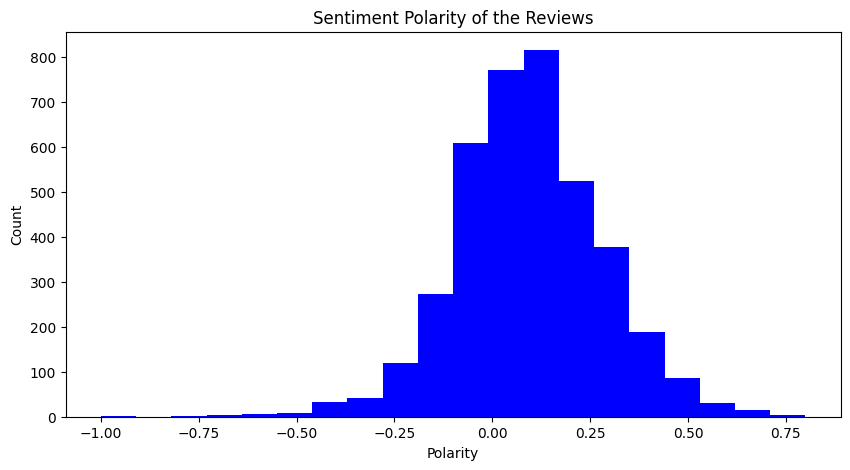

In [37]:
#plotting the sentiment polarity of the reviews using a histogram

plt.figure(figsize=(10,5))
plt.hist(df['polarity'], bins=20, color='blue')
plt.title('Sentiment Polarity of the Reviews')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [38]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mohdt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

df['label'] = 0

for i in range(len(df.corpus)):

    score = vds.polarity_scores(df.corpus[i])['compound']
    if score > 0.2:
        df['label'][i] = 1
    elif score < 0:
        df['label'][i] = -1
    else:
        df['label'][i] = 0

print(df.head())
print(df.label.value_counts())

C:\Users\mohdt\AppData\Local\Temp\ipykernel_12472\1476098086.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 0
C:\Users\mohdt\AppData\Local\Temp\ipykernel_12472\1476098086.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 1
C:\Users\mohdt\AppData\Local\Temp\ipykernel_12472\1476098086.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = -1


                                      Review Content Review Rating  \
0  ✅ Trip Verified | Terrible overall, medium ser...             5   
1  ✅ Trip Verified |   London Heathrow to Male In...             1   
2  Not Verified |  Very good flight following an ...             9   
3  Not Verified |  An hour's delay due to late ar...             9   
4  ✅ Trip Verified |   I booked through BA becaus...             7   

  Review Date    Review Country  Trip Verified  \
0  2025-02-07     (Switzerland)           True   
1  2025-02-01  (United Kingdom)           True   
2  2025-01-20  (United Kingdom)          False   
3  2025-01-19  (United Kingdom)          False   
4  2025-01-15  (United Kingdom)           True   

                                              corpus  polarity  label  
0  ble overall medium service flight delayed help... -0.500000      0  
1  london heathrow male new business class ba con...  0.286526      1  
2  verified good flight following equally good fl...  0.314286

Topic Modeling

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

tf = cv.fit_transform(df['corpus']).toarray()
tf_feature_names = cv.get_feature_names_out()

In [41]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

model.fit(tf)

topic_dict = {}

#looping through model components

for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
        for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
        for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic = pd.DataFrame(topic_dict)

df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,seat,1270.1,flight,1633.6,flight,696.4,flight,806.5,seat,1525.1,flight,496.8,flight,2557.2,flight,366.1
1,ba,1208.5,ba,926.5,seat,608.6,lounge,532.0,class,956.5,airline,440.9,ba,1464.8,good,124.2
2,flight,1123.1,seat,626.3,ba,437.6,crew,482.6,flight,787.4,ba,434.1,hour,985.9,experience,123.6
3,service,908.2,time,379.1,time,283.8,boarding,409.5,good,785.0,food,288.8,british,870.4,crew,106.9
4,meal,862.3,lhr,372.7,crew,232.6,good,351.8,food,690.4,british,275.1,airway,865.9,comfortable,106.0
5,food,758.6,good,353.0,plane,211.2,ba,348.1,first,645.4,airway,272.9,customer,803.6,friendly,105.9
6,economy,726.1,service,344.2,row,198.7,time,344.6,business,629.9,time,256.7,told,770.4,time,105.9
7,cabin,648.9,heathrow,321.1,airway,189.6,service,337.9,cabin,618.3,service,212.9,service,700.2,lhr,102.6
8,class,607.4,return,282.1,british,182.8,check,294.7,crew,573.5,cabin,201.8,would,699.4,seat,100.0
9,crew,575.6,london,273.0,cabin,180.3,cabin,284.0,ba,504.2,review,191.4,london,681.3,london,100.0


In [42]:
#average rating of the reviews

#for that first we need to change the datatype of the review rating column

df['Review Rating'] = df['Review Rating'].astype(int)

print("Average Rating: ", df['Review Rating'].mean())

Average Rating:  3.901177675371224


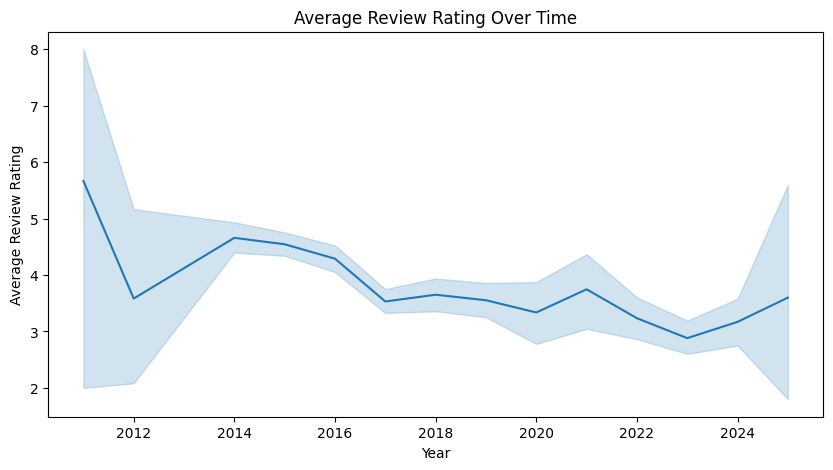

In [43]:
#plotting the average review rating over time

df['year'] = df['Review Date'].dt.year
df['month'] = df['Review Date'].dt.month

plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='Review Rating', data=df)
plt.title('Average Review Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Review Rating')
plt.show()

In [44]:
df.head()

,Review Content,Review Rating,Review Date,Review Country,Trip Verified,corpus,polarity,label,year,month
0,"✅ Trip Verified | Terrible overall, medium ser...",5,2025-02-07,(Switzerland),True,ble overall medium service flight delayed help...,-0.500000,0,2025,2
1,✅ Trip Verified | London Heathrow to Male In...,1,2025-02-01,(United Kingdom),True,london heathrow male new business class ba con...,0.286526,1,2025,2
2,Not Verified | Very good flight following an ...,9,2025-01-20,(United Kingdom),False,verified good flight following equally good fl...,0.314286,1,2025,1
3,Not Verified | An hour's delay due to late ar...,9,2025-01-19,(United Kingdom),False,verified hour delay due late arrival incoming ...,0.137500,1,2025,1
4,✅ Trip Verified | I booked through BA becaus...,7,2025-01-15,(United Kingdom),True,booked ba loganair representative manchester a...,0.041667,0,2025,1


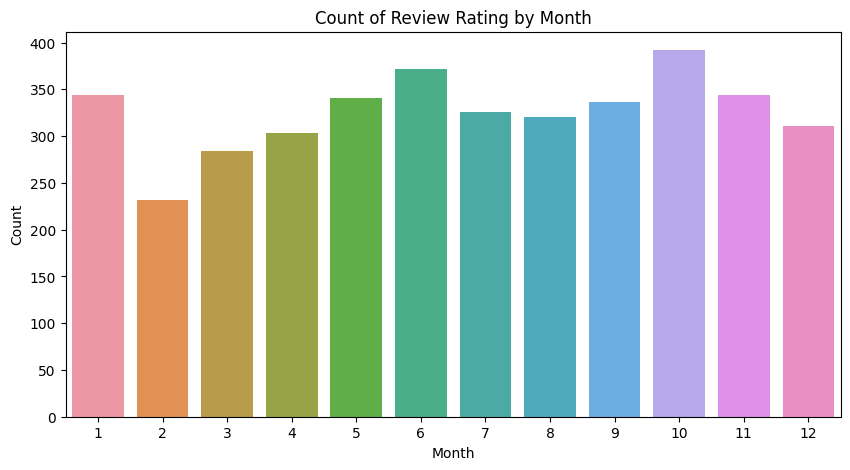

In [45]:
#plotting the count of review rating by month


plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df)
plt.title('Count of Review Rating by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [46]:
#average review rating of the verified trip only and count of the verified trip as well

print("Average Review Rating of the Verified Trip: ", df[df['Trip Verified'] == True]['Review Rating'].mean())
print("Count of the Verified Trip: ", df[df['Trip Verified'] == True].shape[0])
print("Average Review Rating of the Non-Verified Trip: ", df[df['Trip Verified'] == False]['Review Rating'].mean())
print("Count of the Non-Verified Trip: ", df[df['Trip Verified'] == False].shape[0])

Average Review Rating of the Verified Trip:  3.3920367534456357
Count of the Verified Trip:  1306
Average Review Rating of the Non-Verified Trip:  4.156923076923077
Count of the Non-Verified Trip:  2600


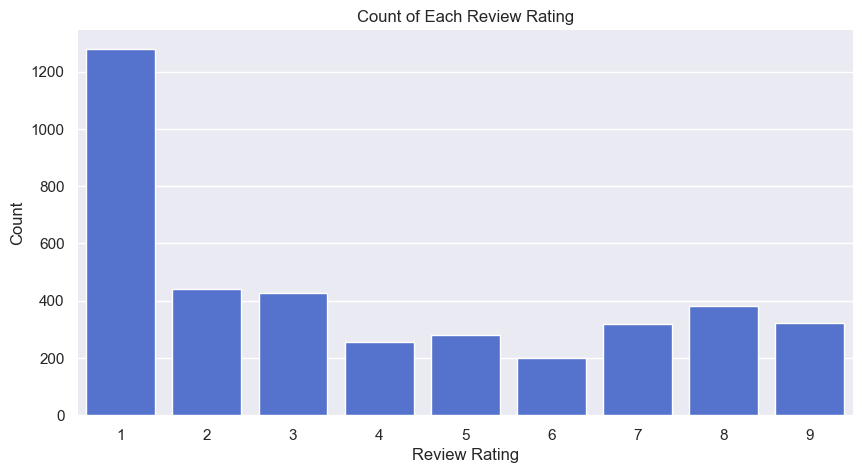

In [ ]:
#plotting the count of each review rating

plt.figure(figsize=(10,5))
sns.countplot(df, x="Review Rating", color="royalblue")  # Use a single blue color
plt.title('Count of Each Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Count')
sns.despine(left=True, bottom=True)
plt.show()
